In [6]:

import sys

sys.path.append('..')
from src.models.gcmol import GCMol


/Users/lapuerta/miniconda3/envs/cell-diffusion-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
gcmol_model = GCMol(model_name="../models/gcmol")

smiles_list = ["CCO", "c1ccc(cc1)C(=O)Nc1ccc(cc1)N"]
embeddings = gcmol_model.mol_encode(smiles_list)

print("Embeddings shape:", embeddings.shape)
print("First embedding (first 10 dims):", embeddings[0, :10])

Embeddings shape: torch.Size([2, 2048])
First embedding (first 10 dims): tensor([ 0.0096,  0.0546, -0.0074,  0.0694,  0.0496,  0.1529, -0.1148,  0.0920,
         0.0706,  0.1109])


In [8]:
embeddings[1, :10]

tensor([ 7.2192e-02,  2.1949e-01, -2.7315e-02, -5.8748e-02,  3.5200e-02,
         1.6102e-01, -2.3860e-02,  1.2561e-01,  8.7924e-05,  8.1163e-02])

In [9]:
import pandas as pd

# Suppose you have a CSV with columns: [SMILES, activity_label, ...]
df_chem = pd.read_csv("../datasets/cpg0012/chemical_annotations.csv")
df_chem.head()

,BROAD_ID,CPD_NAME,CPD_NAME_TYPE,CPD_SAMPLE_ID,DOS_LIBRARY,SOURCE_NAME,CHEMIST_NAME,VENDOR_CATALOG_ID,CPD_SMILES,USERCOMMENT
0,BRD-A56675431-001-04-0,altizide,INN,SA82748,NaN,Prestwick Chemical Inc.,NaN,Prestw-721,NS(=O)(=O)c1cc2c(NC(CSCC=C)NS2(=O)=O)cc1Cl,NaN
1,BRD-A51829654-001-01-4,"BRL-15,572",common,SA82481,NaN,Biomol International Inc.,NaN,AC-536,OC(CN1CCN(CC1)c1cccc(Cl)c1)C(c1ccccc1)c1ccccc1,NaN
2,BRD-K04046242-001-03-6,equilin,primary-common,SA82922,NaN,Prestwick Chemical Inc.,NaN,Prestw-850,C[C@]12CC[C@H]3C(=CCc4cc(O)ccc34)[C@@H]1CCC2=O,NaN
3,BRD-K16508793-001-01-8,diazepam,INN,SA59660,NaN,MicroSource Discovery Systems Inc.,NaN,1900003,CN1c2ccc(Cl)cc2C(=NCC1=O)c1ccccc1,NaN
4,BRD-K09397065-001-01-6,SR 57227A,to-be-curated,SA82504,NaN,Biomol International Inc.,NaN,AC-561,NC1CCN(CC1)c1cccc(Cl)n1,NaN


In [20]:
df_chem = df_chem.dropna(subset=["CPD_SMILES"]).reset_index(drop=True)

# For a quick test, let's just select a small subset:
df_subset = df_chem.head(100)  # or random sample, e.g.: df_chem.sample(10, random_state=42)
all_smiles = df_subset["CPD_SMILES"].tolist()
df_subset

,BROAD_ID,CPD_NAME,CPD_NAME_TYPE,CPD_SAMPLE_ID,DOS_LIBRARY,SOURCE_NAME,CHEMIST_NAME,VENDOR_CATALOG_ID,CPD_SMILES,USERCOMMENT
0,BRD-A56675431-001-04-0,altizide,INN,SA82748,NaN,Prestwick Chemical Inc.,NaN,Prestw-721,NS(=O)(=O)c1cc2c(NC(CSCC=C)NS2(=O)=O)cc1Cl,NaN
1,BRD-A51829654-001-01-4,"BRL-15,572",common,SA82481,NaN,Biomol International Inc.,NaN,AC-536,OC(CN1CCN(CC1)c1cccc(Cl)c1)C(c1ccccc1)c1ccccc1,NaN
2,BRD-K04046242-001-03-6,equilin,primary-common,SA82922,NaN,Prestwick Chemical Inc.,NaN,Prestw-850,C[C@]12CC[C@H]3C(=CCc4cc(O)ccc34)[C@@H]1CCC2=O,NaN
3,BRD-K16508793-001-01-8,diazepam,INN,SA59660,NaN,MicroSource Discovery Systems Inc.,NaN,1900003,CN1c2ccc(Cl)cc2C(=NCC1=O)c1ccccc1,NaN
4,BRD-K09397065-001-01-6,SR 57227A,to-be-curated,SA82504,NaN,Biomol International Inc.,NaN,AC-561,NC1CCN(CC1)c1cccc(Cl)n1,NaN
...,...,...,...,...,...,...,...,...,...,...
95,BRD-K17497770-001-01-0,butein,common,SA63271,NaN,Calbiochem,NaN,203987,Oc1ccc(C(=O)\C=C\c2ccc(O)c(O)c2)c(O)c1,NaN
96,BRD-K01624546-001-02-8,DOCOSATRIENOIC ACID (22:3 n-3),to-be-curated,SA81992,NaN,Biomol International Inc.,NaN,FA-010,CC\C=C/C\C=C/C\C=C/CCCCCCCCCCCC(O)=O,NaN
97,BRD-A72711497-236-02-0,lasalocid,INN,SA59462,NaN,MicroSource Discovery Systems Inc.,NaN,1503244,CC[C@H](C1OC(CC)(C[C@@H]1C)C1CC[C@](O)(CC)[C@H...,NaN
98,BRD-K06147391-003-01-9,telenzepine,INN,SA59719,NaN,MicroSource Discovery Systems Inc.,NaN,1504187,CN1CCN(CC(=O)N2c3c(C)scc3C(=O)Nc3ccccc23)CC1,NaN


/Users/lapuerta/miniconda3/envs/cell-diffusion-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/lapuerta/miniconda3/envs/cell-diffusion-env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


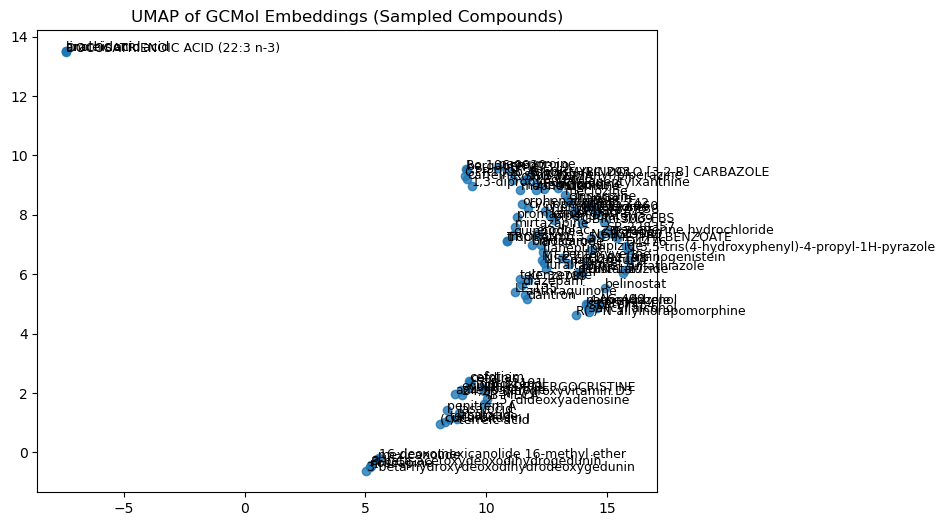

In [21]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

emb_list = gcmol_model.mol_encode(all_smiles)
embeddings = emb_list.detach().cpu().numpy()  # shape: (N, embedding_dim)

reducer = umap.UMAP(n_neighbors=3, min_dist=0.1, random_state=42)
emb_2d = reducer.fit_transform(embeddings)

plt.figure(figsize=(8,6))
plt.scatter(emb_2d[:,0], emb_2d[:,1], alpha=0.8)
for i, name in enumerate(df_subset["CPD_NAME"]):
    plt.text(emb_2d[i,0], emb_2d[i,1], name, fontsize=9)
plt.title("UMAP of GCMol Embeddings (Sampled Compounds)")
plt.show()